# here is the magic words

%matplotlib inline is for juypter-lab(or juypter notebook) to show graphs in the books

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## data gen

In [2]:
x = np.linspace(-3, 3, 10)
y = np.exp(x)
print(x)
print(y)

[-3.         -2.33333333 -1.66666667 -1.         -0.33333333  0.33333333
  1.          1.66666667  2.33333333  3.        ]
[ 0.04978707  0.09697197  0.1888756   0.36787944  0.71653131  1.39561243
  2.71828183  5.29449005 10.3122585  20.08553692]


## create figure object and axes.Axes object

matplotlib.pyplot.subplots returns two objects which are figure object and axes.Axes object.

[here is the documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html?highlight=matplotlib%20pyplot%20subplots#matplotlib.pyplot.subplots)

Figure is basically one graph object which can contains multiple axes.Axes object (this is an actual graph).

This is an example of making one graph in one figure object.
Figure information can be added when plt.subplots called.

- [figure](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure)

###  Side note : 'squeeze=False' is useful argument.

As default, it is True and if it was True and 1*1 figure was generate, axes would become axes[0], instead of axes[0,0].

これはつまり、axesの書き方を1個のグラフでも複数のグラフでも同じ書き方が出来るメリットがある。

And graph modification can be done using axes methods().

axesに対して色々な設定ができる。


- [axes.Axes](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes)

### axesは次の方法で追加できる

- plt.plot()
- plt.subplot()
- fig.add_subplot()
- fig.subplots()

don't know the details about these, but the easiest way is using fig.subplots() for me/

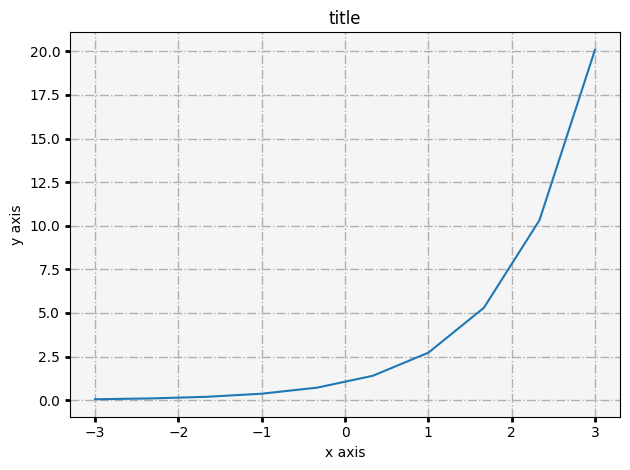

In [3]:
fig, axes = plt.subplots(1, 1, tight_layout=True, squeeze=False, edgecolor='white', linewidth=1)

axes[0,0].plot(x, y)
axes[0,0].set_title('title')
axes[0,0].set_xlabel('x axis')
axes[0,0].set_ylabel('y axis')
axes[0,0].set_facecolor('whitesmoke')
axes[0,0].tick_params(direction='out', axis='both', width=2)
axes[0,0].grid(visible=True, which='major', axis='both', linewidth=1, linestyle='-.')
plt.show()

## dataframe generation from csv file

read_csv method is the best way to read csv files. The minimum argument would be a filename to the method.

[read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html?highlight=read_csv)

### header

you can import header data from certain row of the csv file read.

For example, if you want to set first row as header (colum name in pandas world), you can do like below.

the argument of header is int which represents of row of the file.

headerオプションで、csvからデータフレームのラベルをくっつける事ができる。

In [4]:
file_name = './data/test.csv'
df_csv = pd.read_csv(file_name, header=0)

In [5]:
display(df_csv)

,freq[Mhz],data[dB]
0,10,0
1,20,1
2,30,-2
3,40,-3
4,50,-2
5,60,-1
6,70,1
7,80,-2
8,90,0


### column name and index name

- you can get column names as list using 'columns'
- you can get index names as list using 'index'


In [6]:
list = df_csv.columns
print(f'colum of the df_csv: {list}')

index_df_csv = df_csv.index
print(index_df_csv)


colum of the df_csv: Index(['freq[Mhz]', 'data[dB]'], dtype='object')
RangeIndex(start=0, stop=9, step=1)


## to set index and column name

[official document](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)

In [7]:
df_csv.rename(index={0:11}, columns={'freq[Mhz]': 'freq_mhz', 'data[dB]': 'data_db'}, inplace=True)
display(df_csv)

,freq_mhz,data_db
11,10,0
1,20,1
2,30,-2
3,40,-3
4,50,-2
5,60,-1
6,70,1
7,80,-2
8,90,0


### to set column of the csv file as index

## pandas and plot

[official site](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)

if you were using dataframe, the way below is the easiest way to plot something which are in the dataframe.

<AxesSubplot:title={'center':'test title'}, xlabel='freq_mhz'>

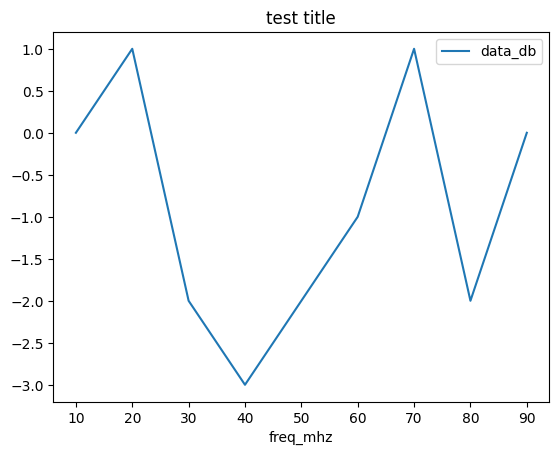

In [8]:
list = df_csv.columns
df_csv.plot(x=list[0], y=list[1], title='test title')

# 

## dataframe with matplotlib

Using object-oriented method of matplotlib, you can control more on the figure.
How to do is on the [link here](https://jonathansoma.com/lede/algorithms-2017/classes/fuzziness-matplotlib/how-pandas-uses-matplotlib-plus-figures-axes-and-subplots/)
The key point is 'ax' that tells dataframe to which ax he should be fit in.

Tip: you should set axes after 'dataframe.plot' done. Otherwise, some settings are not applied.

In [9]:
print(df_csv)

    freq_mhz  data_db
11        10        0
1         20        1
2         30       -2
3         40       -3
4         50       -2
5         60       -1
6         70        1
7         80       -2
8         90        0


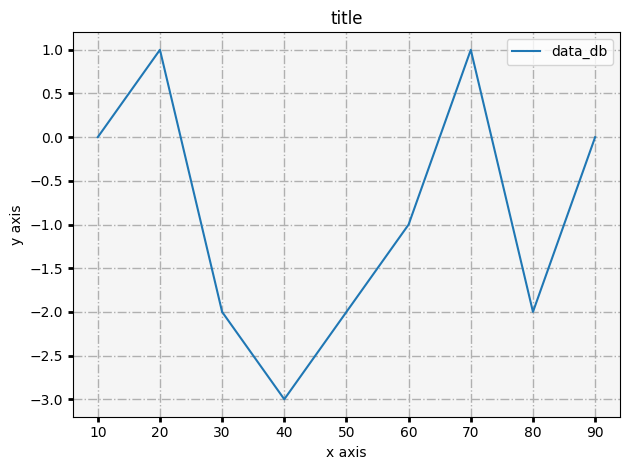

In [10]:
fig, axes = plt.subplots(1, 1, tight_layout=True, squeeze=False, edgecolor='white', linewidth=1)

df_csv.plot(x=list[0], y=list[1], ax=axes[0,0])
axes[0,0].set_title('title')
axes[0,0].set_xlabel('x axis')
axes[0,0].set_ylabel('y axis')
axes[0,0].set_facecolor('whitesmoke')
axes[0,0].tick_params(direction='out', axis='both', width=2)
axes[0,0].grid(visible=None, which='major', axis='both', linewidth=1, linestyle='-.')
plt.show()

In [11]:
data1 = pd.read_csv('./data/pandas_plot1.csv', header=0)
display(data1)

data2 = pd.read_csv('./data/pandas_plot2.csv', header=0)
display(data2)

,freq_hz,level_dbm
0,100,0
1,500,-1
2,1000,-3
3,1500,-5
4,2000,-7
5,2500,-10
6,3000,-15


,freq_hz,level_dbm
0,1500,-9
1,2900,-10
2,5700,-15
3,7800,-21
4,9900,-28
5,12000,-40
6,15000,-45


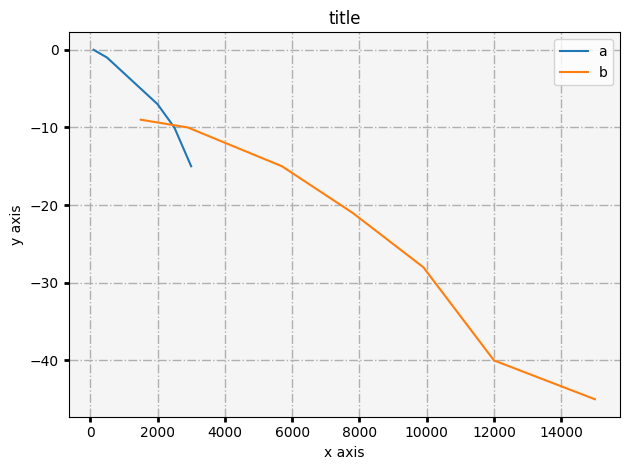

In [12]:
fig, axes = plt.subplots(1, 1, tight_layout=True, squeeze=False, edgecolor='white', linewidth=1)

list1 = data1.columns
list2 = data1.columns

data1.plot(x=list1[0], y=list1[1], ax=axes[0,0], label='a')
data2.plot(x=list1[0], y=list1[1], ax=axes[0,0], label='b')
axes[0,0].set_title('title')
axes[0,0].set_xlabel('x axis')
axes[0,0].set_ylabel('y axis')
axes[0,0].set_facecolor('whitesmoke')
axes[0,0].tick_params(direction='out', axis='both', width=2)
axes[0,0].grid(visible=None, which='major', axis='both', linewidth=1, linestyle='-.')
plt.show()